In [1]:
import pandas as pd 

In [9]:
df = pd.read_csv('brfss2013.csv', encoding='ISO-8859-1')

C:\Users\beatr\AppData\Local\Temp\ipykernel_13296\3191139629.py:1: DtypeWarning: Columns (11,14,50,53,102,103,104,105,108,111,112,113,118,119,120,121,122,123,125,126,127,130,132,134,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,177,178,179,180,181,182,183,184,185,186,187,188,190,191,192,193,194,195,197,199,200,201,202,203,204,205,206,207,208,209,210,211,212,216,226,227,228,229,230,312) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('brfss2013.csv', encoding='ISO-8859-1')


In [13]:
df.columns

Index(['X_state', 'fmonth', 'idate', 'imonth', 'iday', 'iyear', 'dispcode',
       'seqno', 'X_psu', 'ctelenum',
       ...
       'X_pastae1', 'X_lmtact1', 'X_lmtwrk1', 'X_lmtscl1', 'X_rfseat2',
       'X_rfseat3', 'X_flshot6', 'X_pneumo2', 'X_aidtst3', 'X_age80'],
      dtype='object', length=330)

In [19]:
sample_number = int(df.shape[0]*0.30)

In [21]:
muestra = df.sample(n=sample_number)

### 1A) SAMPLING 
Hemos decidido hacer stratified sampling para respetar el número de casos en la muestra según el estado de salud. 
Nos quedamos con un 30% de la población total. Así nos aseguramos de que los diferentes subgrupos estén correctamente representados en la muestra. 


In [32]:
from sklearn.model_selection import train_test_split
# Supongamos que 'age_group' y 'gender' son columnas en el conjunto de datos
#remove NA from genhlth
df = df.dropna(subset=['genhlth'])

# Dividir el conjunto de datos en un subconjunto de muestra y otro que no se usará
# Aquí, stratify=df[strata_vars] asegura que la muestra sea estratificada
# basándonos en las variables de estratificación especificadas
sample_df, _ = train_test_split(df, test_size=0.7, stratify=df["genhlth"])

# sample_df ahora contiene tu muestra estratificada

In [33]:
df['genhlth'].value_counts()

Very good    159076
Good         150555
Excellent     85482
Fair          66726
Poor          27951
Name: genhlth, dtype: int64

In [34]:
sample_df['genhlth'].value_counts()

Very good    47723
Good         45166
Excellent    25645
Fair         20018
Poor          8385
Name: genhlth, dtype: int64

### 1B) GENERAL EDA

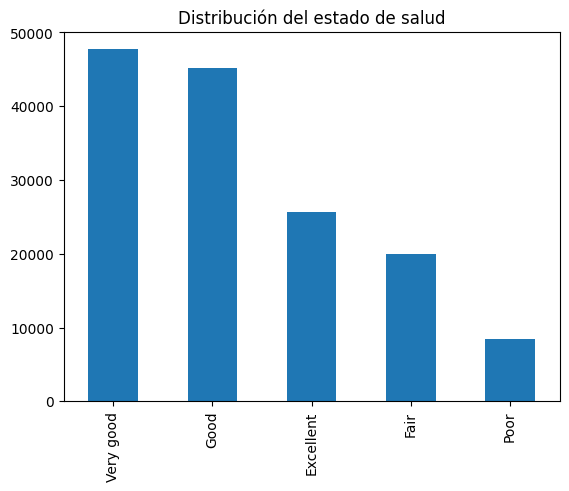

In [42]:
#Histograma según genhtlh
import matplotlib.pyplot as plt
sample_df['genhlth'].value_counts().plot(kind='bar')
plt.title("Distribución del estado de salud")
plt.show()

In [47]:
#transform marital status variable, when is A member of an unmarried couple put dating 
sample_df['marital'] = sample_df['marital'].apply(lambda x: 'Dating' if x == 'A member of an unmarried couple' else x)

In [49]:
sample_df['Health'] = sample_df['genhlth'].apply(lambda x: "Healthy" if x in ['Excellent', 'Very good','Good'] else "Not Healthy")


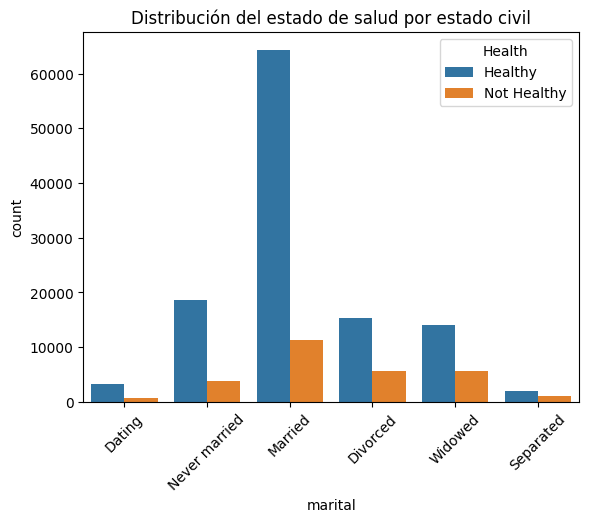

In [50]:

#grafico de barras apliado con marital status y health status 
import seaborn as sns
sns.countplot(x='marital', hue='Health', data=sample_df)
plt.title("Distribución del estado de salud por estado civil")
plt.xticks(rotation=45)
plt.show()


In [63]:
print(sample_df.columns)

Index(['X_state', 'fmonth', 'idate', 'imonth', 'iday', 'iyear', 'dispcode',
       'seqno', 'X_psu', 'ctelenum',
       ...
       'X_lmtact1', 'X_lmtwrk1', 'X_lmtscl1', 'X_rfseat2', 'X_rfseat3',
       'X_flshot6', 'X_pneumo2', 'X_aidtst3', 'X_age80', 'Health'],
      dtype='object', length=331)


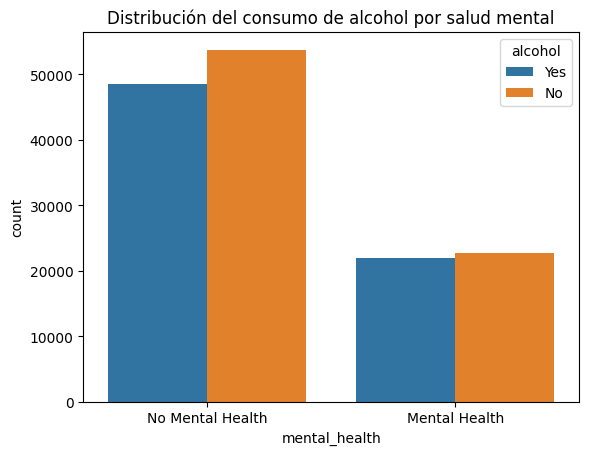

In [56]:

sns.countplot(x='mental_health', hue='alcohol', data=sample_df)
plt.title("Distribución del consumo de alcohol por salud mental")
plt.show()


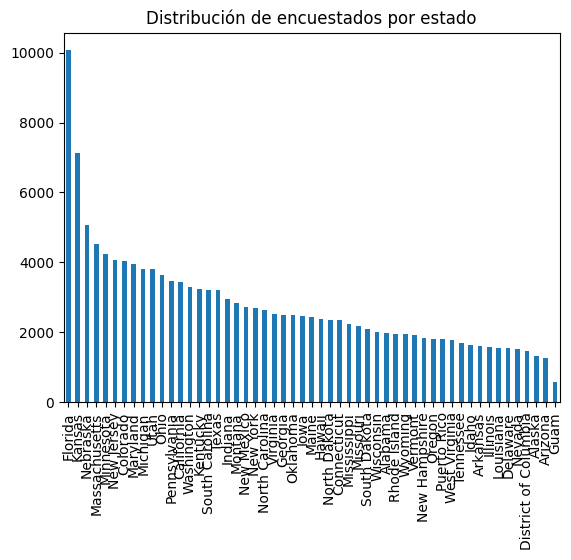

In [65]:
#Distribución del número de encuestados por estado de USA, haz un mapa. En X_state encontrarás el estado.
import plotly.express as px
sample_df['X_state'].value_counts().plot(kind='bar')
plt.title("Distribución de encuestados por estado")
plt.show()


In [68]:
sample_df['sex'].value_counts()

Female    86671
Male      60266
Name: sex, dtype: int64

In [69]:
sample_df['income2'].value_counts()

$75,000 or more      34527
Less than $75,000    19598
Less than $50,000    18617
Less than $35,000    14576
Less than $25,000    12486
Less than $20,000    10234
Less than $15,000     8028
Less than $10,000     7699
Name: income2, dtype: int64

In [74]:
income_male = sample_df[sample_df['sex'] == 'Male']['income2']

In [76]:
income_male = income_male.value_counts() 

In [79]:
income_female = sample_df[sample_df['sex'] == 'Female']['income2'].value_counts()

In [81]:
type(income_male)

pandas.core.series.Series

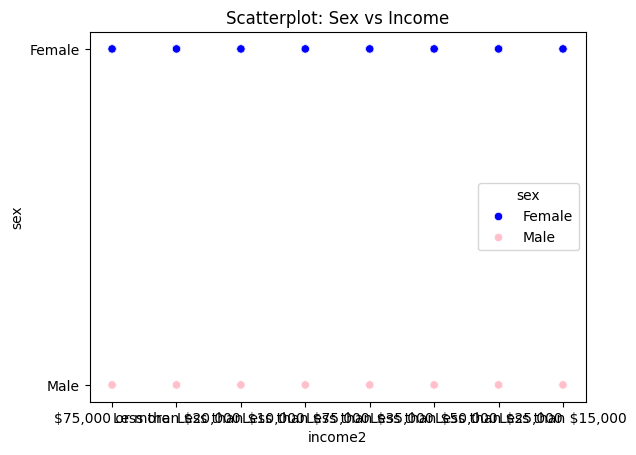

In [73]:
sns.scatterplot(x='income2', y='sex', data=sample_df, hue='sex', palette=['blue', 'pink'])
plt.title("Scatterplot: Sex vs Income")
plt.show()
